<a href="https://colab.research.google.com/github/shreyagiri98/Assignment---Data-Generation-using-Modelling-and-Simulation-for-Machine-Learning/blob/main/102303684_Assignment6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 6 : Data Generation using Modelling and Simulation for Machine Learning
**Name:** Shreya Giri
**Roll No:** 102303684

## Methodology
1. **Simulation**: We simulated a Call Center environment using `SimPy`.
   - **System**: M/M/c queue (Poisson arrivals, Exponential service times, c servers).
   - **Parameters**:
     - `Num_Employees` (c): 1 to 10
     - `Avg_Support_Time` (1/mu): 20 to 60 minutes
     - `Customer_Interval` (1/lambda): 1 to 10 minutes
   - **Output**: `Avg_Wait_Time` per simulation run.
2. **Data Generation**: Ran the simulation 1000 times with random parameters to create a dataset.
3. **Machine Learning**: We will now train multiple regression models to predict `Avg_Wait_Time` based on the system parameters.


In [1]:
import pandas as p
import numpy as n
import matplotlib.pyplot as plt
import seaborn as s
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

d = p.read_csv('simulation_data.csv')
print(d.head())
print(d.describe())

   Num_Employees  Avg_Support_Time  Customer_Interval  Avg_Wait_Time
0              2         21.000430           3.475264     156.346619
1              9         23.916349           6.869304       0.000000
2              6         57.569486           2.038076     152.267026
3              8         56.340175           3.676178      85.654124
4              5         38.273433           3.719095      90.217844
       Num_Employees  Avg_Support_Time  Customer_Interval  Avg_Wait_Time
count    1000.000000       1000.000000        1000.000000    1000.000000
mean        5.535000         39.805626           5.498649      79.933797
std         2.838809         11.839419           2.614337      71.783270
min         1.000000         20.002796           1.007464       0.000000
25%         3.000000         29.149797           3.243161       5.867330
50%         5.000000         39.737667           5.400197      70.117687
75%         8.000000         50.213709           7.803910     142.323828
ma

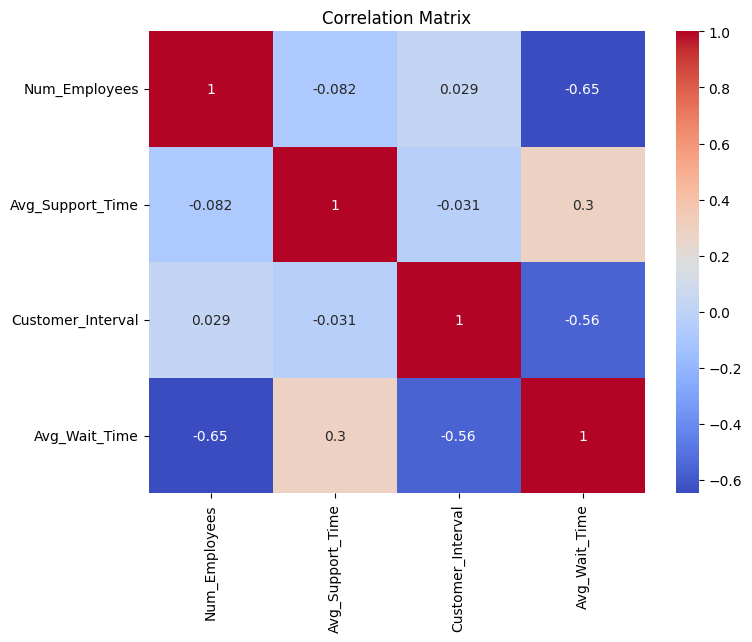

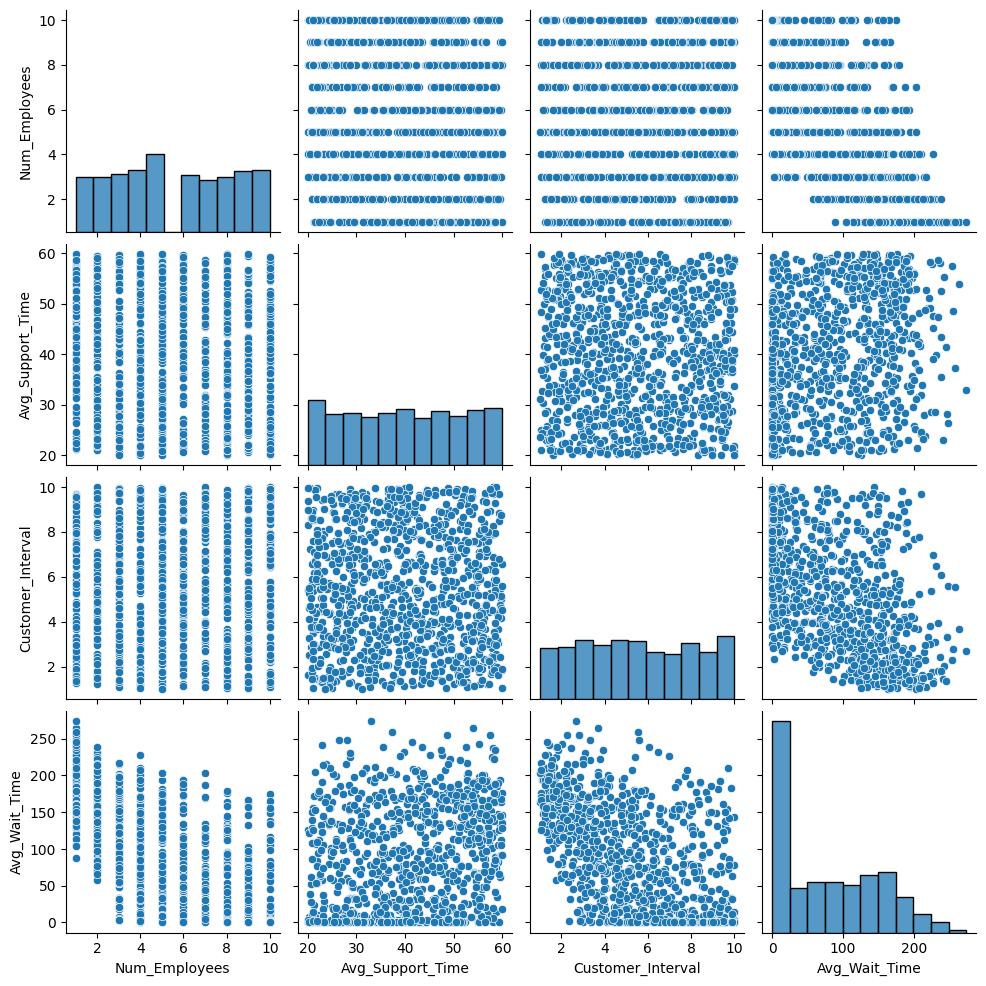

In [2]:
plt.figure(figsize=(8, 6))
s.heatmap(d.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

s.pairplot(d)
plt.show()

In [3]:
x = d.drop('Avg_Wait_Time', axis=1)
y = d['Avg_Wait_Time']

xt, xe, yt, ye = train_test_split(x, y, test_size=0.2, random_state=42)

sc = StandardScaler()
xst = sc.fit_transform(xt)
xse = sc.transform(xe)

In [4]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import numpy as n # Re-import numpy to ensure 'n' is numpy here

m = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "SVR": SVR(),
    "KNN": KNeighborsRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "Extra Trees": ExtraTreesRegressor()
}

r = []

for k, o in m.items():
    o.fit(xst, yt)
    yp = o.predict(xse)

    e = n.sqrt(mean_squared_error(ye, yp))
    t = r2_score(ye, yp)

    r.append({
        "Model": k,
        "RMSE": e,
        "R2 Score": t
    })

rd = p.DataFrame(r).sort_values(by="R2 Score", ascending=False)
print(rd)

               Model       RMSE  R2 Score
5  Gradient Boosting  25.778041  0.863770
4      Random Forest  27.298302  0.847228
7                KNN  27.387074  0.846233
9        Extra Trees  27.940230  0.839959
0  Linear Regression  32.623152  0.781816
1              Ridge  32.628231  0.781748
2              Lasso  32.756806  0.780024
8           AdaBoost  33.855216  0.765024
6                SVR  35.524687  0.741279
3      Decision Tree  37.132763  0.717326


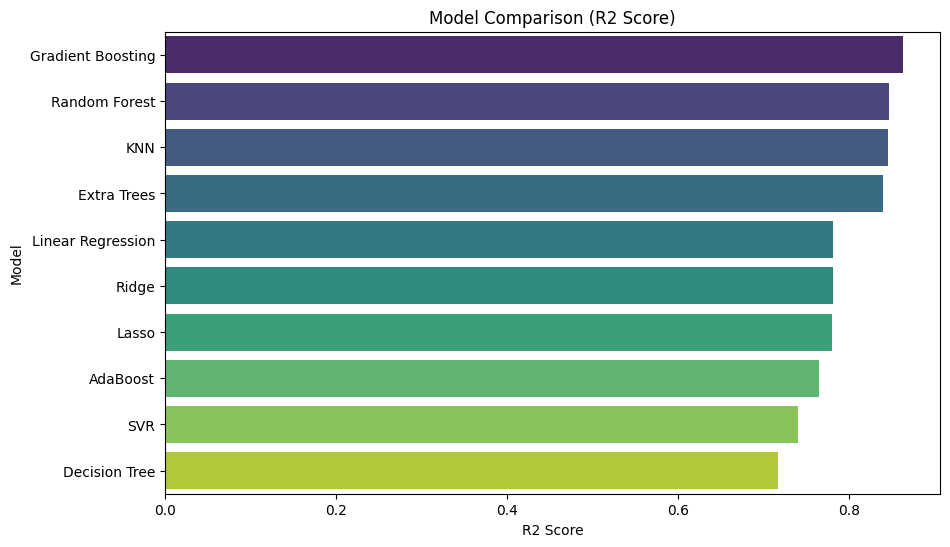

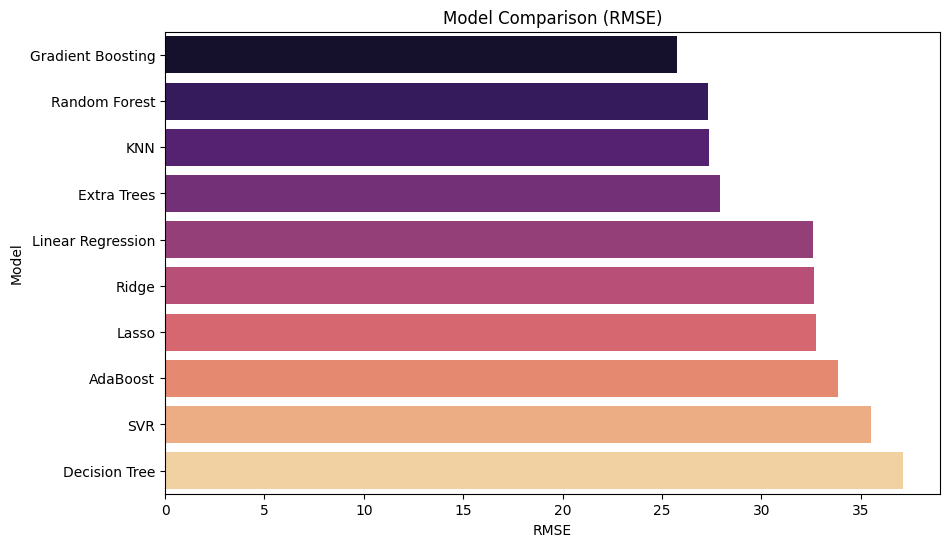

In [5]:
import seaborn as s
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
s.barplot(x='R2 Score', y='Model', data=rd, palette='viridis')
plt.title('Model Comparison (R2 Score)')
plt.show()

plt.figure(figsize=(10, 6))
s.barplot(x='RMSE', y='Model', data=rd, palette='magma')
plt.title('Model Comparison (RMSE)')
plt.show()

In [6]:
b = rd.iloc[0]['Model']
print(f"The best performing model is: {b}")

The best performing model is: Gradient Boosting
